<a href="https://colab.research.google.com/github/sangramdhurve/Hands_On_OpenCV/blob/main/Bitwise_Operations_on_images/CvBitwise_Operations_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Image Enhancement Using Bitwise Operations

Image Processing techniques take advantage of differnet logical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic logical operations like AND or OR operations. In this notebook we will take a look at some of the fundamental bitwise operations often used in computer vision pipelines.

In [1]:
# Import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image

## Bitwise Operations

### <font style='color:rgb(8,133,37)'>Function Syntax</font>

Example API for `cv2.bitwise_and()`. Others include:
`cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`

``` python
sdt = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```
The function has **2 required arguments**:

* 1 `src1`: first input array or a scalar.
* 2 `src2`: second input array or a scalar.

An important optional argument is:

1. `mask`: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html
https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14

(200, 499)


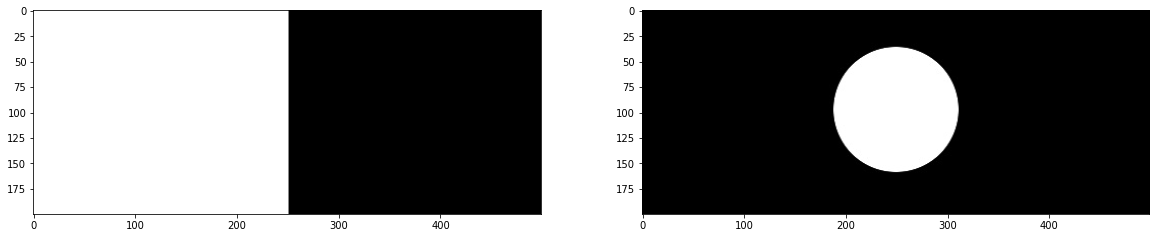

In [14]:
img_rec = cv2.imread("/content/drive/MyDrive/Python projects/OpenCV/SangramCV/Bitwise_Operations_on_images/rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("/content/drive/MyDrive/Python projects/OpenCV/SangramCV/Bitwise_Operations_on_images/circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

#Bitwise AND Operator

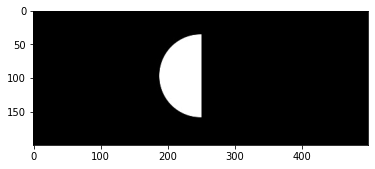

In [15]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(result, cmap='gray')

#Bitwise OR Operator

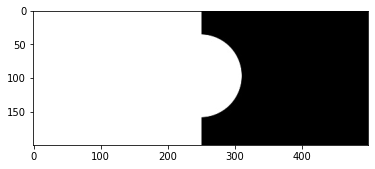

In [16]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap='gray')

#Bitwise XOR Operator

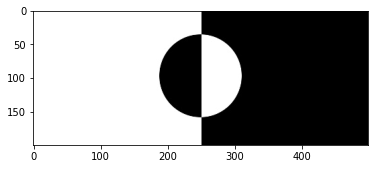

In [18]:
result = cv2.bitwise_xor(img_rec, img_cir, mask =None)
plt.imshow(result, cmap='gray')

#Application: Logo Manipulation
In this section we will show you to fill in the white lettering of the Coca-Cola below with a background image.

#Read Foreground image

(700, 700, 3)


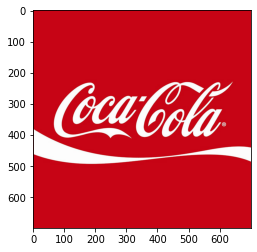

In [19]:
img_bgr = cv2.imread("/content/drive/MyDrive/Python projects/OpenCV/SangramCV/Bitwise_Operations_on_images/coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

#Read Background image

(700, 700, 3)


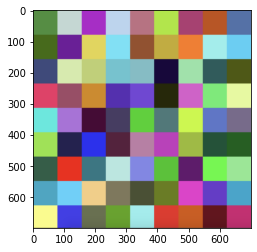

In [21]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("/content/drive/MyDrive/Python projects/OpenCV/SangramCV/Bitwise_Operations_on_images/checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

#Set desired width (logh_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to see size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)
plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

#Create Mask for Original Image

(700, 700)


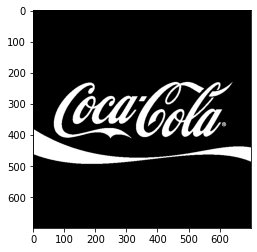

In [23]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

#Apply global thresholidg to creat a binary mask of logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap='gray')
print(img_mask.shape)

#Invert the Mask

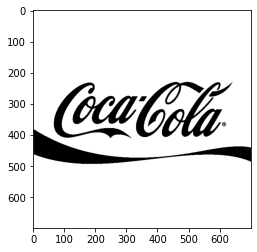

In [24]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap='gray')

#Apply background on the mask

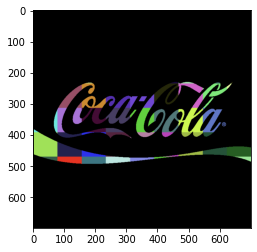

In [25]:
# Create colorful background "behind" the logo lattering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

# Isolate forground from image

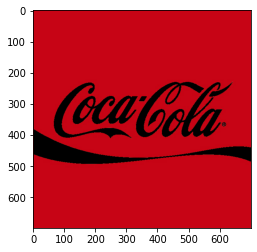

In [26]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

# result: Merge Foreground and Background

True

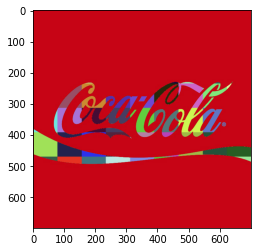

In [27]:
# Add the two previous results obtain the final result
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("final_logo.png", result[:,:,::-1])

#Thank You